# Modelo de mezclas gaussinas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set()

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


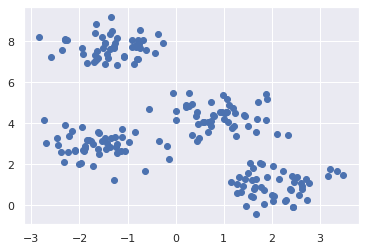

In [4]:
X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1])

Existen dos cretierio
- Akaike infomration
- Bayesian information

Text(0.5, 0, 'Numero de grupo')

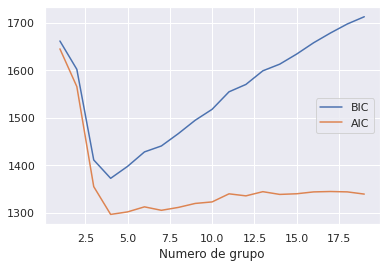

In [7]:
n_cluster = np.arange(1,20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_cluster]
plt.plot(n_cluster, [m.bic(X) for m in models], label='BIC')
plt.plot(n_cluster, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Numero de grupo')

Deberemos tomar el minimo, para el número de grupos

Tambien se puede usar para k-median

In [8]:
gmn = GaussianMixture(n_components=4)
gmn.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

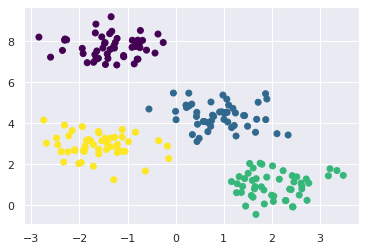

In [11]:
labels = gmn.predict(X)
plt.scatter(X[:,0], X[:,1], cmap='viridis', c=labels)

In [13]:
labels

array([2, 3, 1, 0, 2, 1, 3, 1, 1, 1, 1, 2, 3, 3, 2, 1, 0, 0, 0, 2, 0, 3,
       2, 3, 2, 2, 0, 2, 2, 1, 0, 1, 3, 2, 3, 1, 3, 1, 1, 0, 0, 0, 0, 1,
       2, 3, 1, 0, 0, 1, 0, 3, 3, 0, 1, 0, 3, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       2, 0, 3, 3, 2, 2, 1, 1, 3, 0, 3, 3, 2, 2, 0, 1, 2, 3, 3, 1, 1, 2,
       3, 3, 0, 0, 0, 1, 1, 2, 3, 0, 1, 1, 0, 2, 2, 0, 0, 3, 1, 2, 2, 1,
       0, 3, 3, 2, 2, 1, 3, 3, 0, 1, 0, 3, 1, 2, 1, 3, 1, 3, 2, 1, 3, 2,
       3, 0, 0, 3, 0, 0, 2, 0, 2, 3, 2, 2, 3, 2, 1, 2, 3, 0, 0, 0, 1, 3,
       2, 1, 0, 3, 0, 2, 0, 2, 2, 3, 3, 0, 1, 2, 2, 3, 2, 1, 3, 0, 0, 0,
       1, 1, 3, 1, 3, 2, 1, 2, 1, 3, 3, 0, 1, 0, 2, 2, 1, 0, 3, 3, 3, 1,
       0, 2])

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [16]:
X_train = np.load('data.npy')

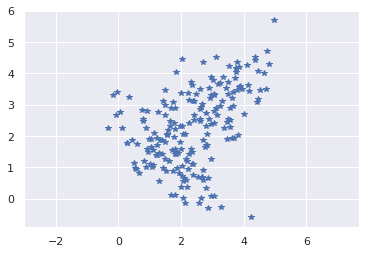

In [17]:
plt.plot(X_train[:,0], X_train[:,1], 'b*')
plt.axis('equal')
plt.show()

In [18]:
gmn = GaussianMixture(n_components=2)
gmn.fit(X_train)
print('Medias: \n', gmn.means_)
print('Covarianzas: \n', gmn.covariances_)

Medias: 
 [[3.04641134 3.10654272]
 [1.60718016 1.35251723]]
Covarianzas: 
 [[[ 0.83656079  0.37865596]
  [ 0.37865596  0.72727426]]

 [[ 0.74995307 -0.5010097 ]
  [-0.5010097   0.74377694]]]


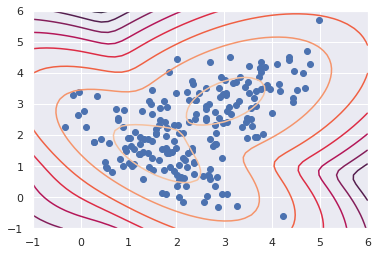

In [20]:
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmn.score_samples(XX)
Z = Z.reshape([50, 50])

plt.contour(X, Y, Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

Las curvas de nivel representan la probabilidad de pertenencia de cada grupo, 
